In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as pltd
import numpy as np
import datetime as dt

In [55]:
#LABOR FORCE PARTICIPATION DATA

lf_df = pd.read_csv('data/Civilian Labor Force Participation Rate.csv')
lf1619_df = pd.read_csv('data/Civilian Labor Force Participation Rate 16 to 19 years.csv')
lf2024_df = pd.read_csv('data/Civilian Labor Force Participation Rate 20 to 24 years.csv')
lf2554_df = pd.read_csv('data/Civilian Labor Force Participation Rate 25 to 54 years.csv')
lf55_df = pd.read_csv('data/Civilian Labor Force Participation Rate 55 years and over.csv')
lf_df

,DATE,Civilian Labor Force Participation Rate
0,1/1/1948,58.6
1,2/1/1948,58.9
2,3/1/1948,58.5
3,4/1/1948,59.0
4,5/1/1948,58.3
5,6/1/1948,59.2
6,7/1/1948,59.3
7,8/1/1948,58.9
8,9/1/1948,58.9
9,10/1/1948,58.7


In [56]:
#PUT VALUES FROM EACH DATASET INTO LIST

#date list
lf_datestring = lf_df['DATE'].tolist()
#labor force data list
lf = lf_df['Civilian Labor Force Participation Rate'].tolist()
lf1619 = lf1619_df['Civilian Labor Force Participation Rate 16 to 19 years'].tolist()
lf2024 = lf2024_df['Civilian Labor Force Participation Rate 20 to 24 years'].tolist()
lf2554 = lf2554_df['Civilian Labor Force Participation Rate 25 to 54 years'].tolist()
lf55 = lf55_df['Civilian Labor Force Participation Rate 55 years and over'].tolist()

In [58]:
#COMBINE DATA LISTS AND MAKE LABELS FOR LEGEND
lf_combined = [lf, lf1619, lf2024, lf2554, lf55]

lf_labels = ['Total', 'Age 16-19', 'Age 20-24', 'Age 25-54', 'Age 55+']

In [116]:
#RECESSION DATA
recessions = pd.read_csv('data/Dates of U.S. recessions as inferred by GDP-based recession indicator.csv')
recessions = recessions.set_index('DATE')
recessions.tail(50)


#create list of recession dates
z = 0
rec_dates = []
rec_store = []
for date, boo in recessions.iterrows():
    
    if boo['REC'] == 1:
        
        rec_store.append(date)
        z = 1
    if boo['REC'] == 0 and z == 1:
        rec_dates.append(rec_store)
        rec_store = []
        z = 0


In [107]:
#CONVERT RECESSION DATE STR TO DATETIME OBJ
rec_datetime = []

for x in range(0, len(rec_dates)):
    rec_conv = []
    
    for date in rec_dates[x]:
        
        temp = temp = dt.datetime.strptime(date, '%m/%d/%Y').date()
        rec_conv.append(temp)
    
    rec_datetime.append(rec_conv)

In [109]:
#GET START AND END DATES FOR EACH RECESSION

rec_start_end_full = []
for rec in rec_datetime:
    
    rec_holder = []
    
    rec_start = rec[0]
    rec_end = rec[-1]
    
    rec_holder.append(rec_start)
    rec_holder.append(rec_end)
    
    rec_start_end_full.append(rec_holder)

rec_start_end_full
    



[[datetime.date(1969, 4, 1), datetime.date(1970, 10, 1)],
 [datetime.date(1973, 10, 1), datetime.date(1975, 1, 1)],
 [datetime.date(1979, 4, 1), datetime.date(1980, 4, 1)],
 [datetime.date(1981, 4, 1), datetime.date(1982, 4, 1)],
 [datetime.date(1989, 10, 1), datetime.date(1991, 1, 1)],
 [datetime.date(2001, 1, 1), datetime.date(2001, 7, 1)],
 [datetime.date(2007, 10, 1), datetime.date(2009, 4, 1)]]

In [115]:
#LABOR FORCE PARTICIPATION DATES

lf_dates = []
lf_datenum = []

for date in lf_datestring:
    
    temp = dt.datetime.strptime(date, '%m/%d/%Y').date()
    num = pltd.date2num(temp)
    lf_dates.append(temp)
    lf_datenum.append(num)

lf_dateticks = pd.date_range(start=lf_dates[0], end=lf_dates[-1], periods=10)

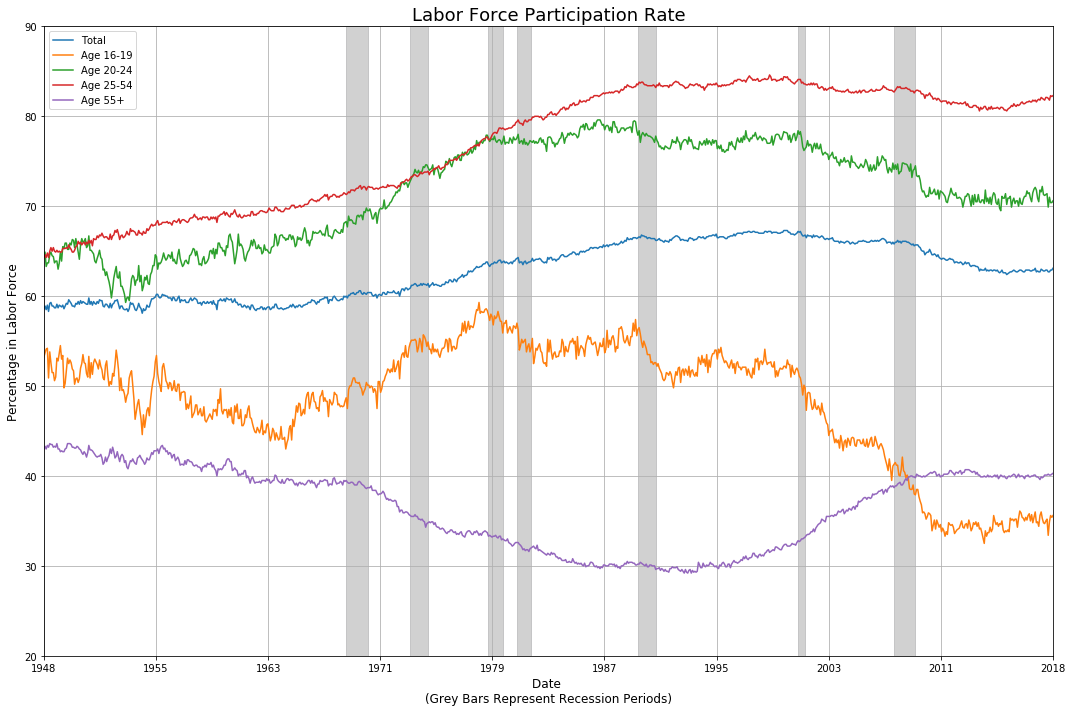

<Figure size 432x288 with 0 Axes>

In [124]:
#PLOT PARCIPATION RATES FOR DIFFERENT GROUPS WITH VERTICAL GREY BARS TO INDICATE RECESSIONS

fig, ax = plt.subplots(figsize=(15,10))
for x in range (0,5):
    
    ax.plot(lf_dates, lf_combined[x], label=lf_labels[x])

for timeperiod in rec_start_end_full:
    ax.axvspan(timeperiod[0], timeperiod[1], color="#a4a4a5", alpha=.5)

plt.ylim(20,90)
plt.xlim(lf_dates[0], lf_dates[-1])
plt.xticks(lf_dateticks)
plt.legend()
plt.grid()
plt.title('Labor Force Participation Rate', fontsize=18)
plt.ylabel('Percentage in Labor Force', fontsize=12)
plt.xlabel('Date \n(Grey Bars Represent Recession Periods)', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('images/Labor Force.png')

In [ ]:
#saved code for reference
testdate = '1/1/1948'
test = dt.datetime.strptime(testdate, '%m/%d/%Y').date()
test